In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten , Dropout 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Set parameters
max_words = 10000 # Consider only the top 10,000 most frequently occurring words
max_length = 250 # Limit the review length to 250 words
embedding_size = 50 # Dimensionality of the word embeddings
# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Preprocess the data

x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

# Build the model
model = Sequential([
    Embedding(max_words, embedding_size, input_length=max_length),  # Embedding layer to vectorize the input sequences
    Flatten(),  # Flatten the 3D tensor to 2D for dense layers
    Dense(128, activation='relu'),  # Additional dense layer
    Dropout(0.5), 
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on test data

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



Epoch 1/10
625/625 [==============================] - 16s 21ms/step - loss: 0.4090 - accuracy: 0.8019 - val_loss: 0.2955 - val_accuracy: 0.8772
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0990 - accuracy: 0.9661 - val_loss: 0.3961 - val_accuracy: 0.8620
Epoch 3/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0110 - accuracy: 0.9979 - val_loss: 0.5198 - val_accuracy: 0.8674
Epoch 4/10
625/625 [==============================] - 11s 17ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5750 - val_accuracy: 0.8702
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 7.6386e-04 - accuracy: 0.9999 - val_loss: 0.6095 - val_accuracy: 0.8664
Epoch 6/10
625/625 [==============================] - 11s 18ms/step - loss: 2.5039e-04 - accuracy: 1.0000 - val_loss: 0.6478 - val_accuracy: 0.8670
Epoch 7/10
625/625 [==============================] - 11s 17ms/step - loss: 1.3137e-04 - accuracy: 1.0000 - val_loss: 0.6724 - v

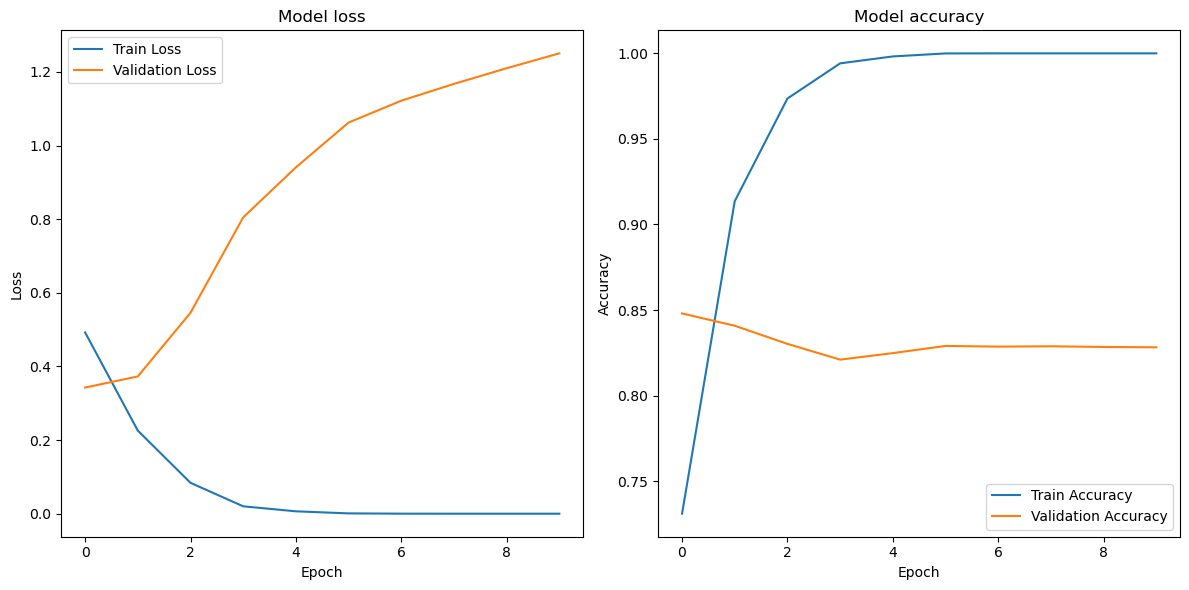

In [6]:
import matplotlib.pyplot as plt
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()